<a href="https://colab.research.google.com/github/Wairioko/User_Valuation/blob/main/Customer_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
data = pd.read_csv('/content/data.csv' )
# remove areas where customer id is null...
# probably cash buys/unregistered customers

print(data.columns)
data.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
data['Quantity'].dtype

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


dtype('int64')

                      average
Country                      
Australia                72.0
Austria                  12.0
Bahrain                   0.0
Belgium                  12.0
Canada                    9.0
Channel Islands          14.0
Cyprus                   14.0
Czech Republic           23.0
Denmark                  26.0
EIRE                     19.0
Finland                  18.0
France                   12.0
Germany                  11.0
Greece                   15.0
Hong Kong                19.0
Iceland                  11.0
Israel                   10.0
Italy                     8.0
Japan                    40.0
Lebanon                   9.0
Lithuania                19.0
Netherlands              84.0
Norway                   20.0
Poland                   13.0
Portugal                 13.0
Saudi Arabia              8.0
Singapore                19.0
Spain                    10.0
Sweden                  119.0
Switzerland              16.0
United Arab Emirates     17.0
United Ki 

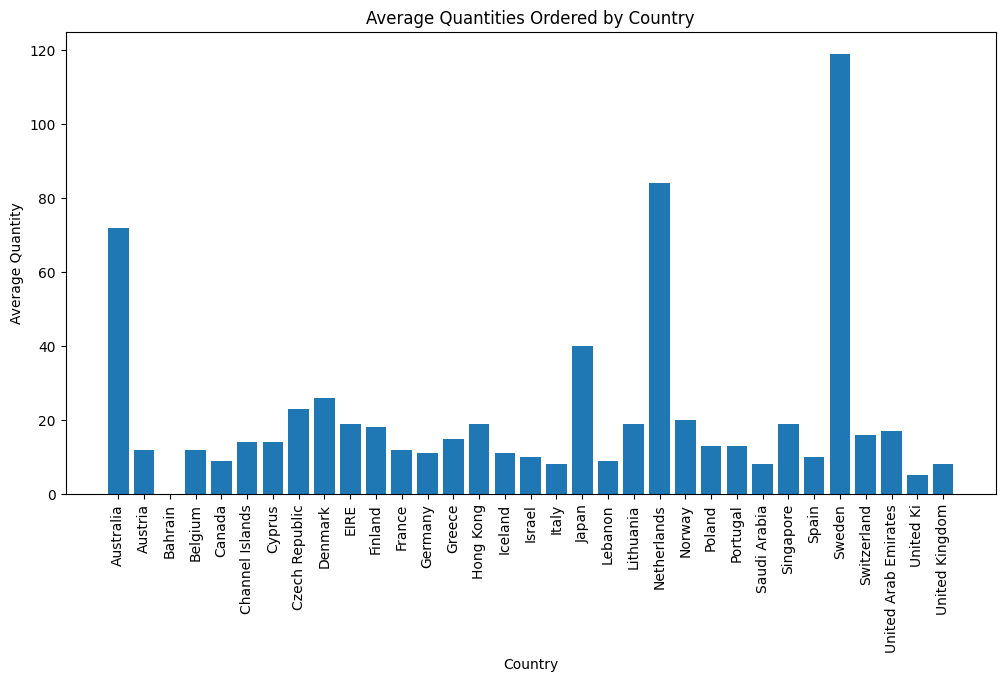

In [5]:
# get average quantities ordered by country
countries_grouped = data.groupby('Country')
quantity_by_country = round(countries_grouped['Quantity'].agg([np.average]))
print(quantity_by_country)
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_country.index, quantity_by_country['average'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.title('Average Quantities Ordered by Country')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


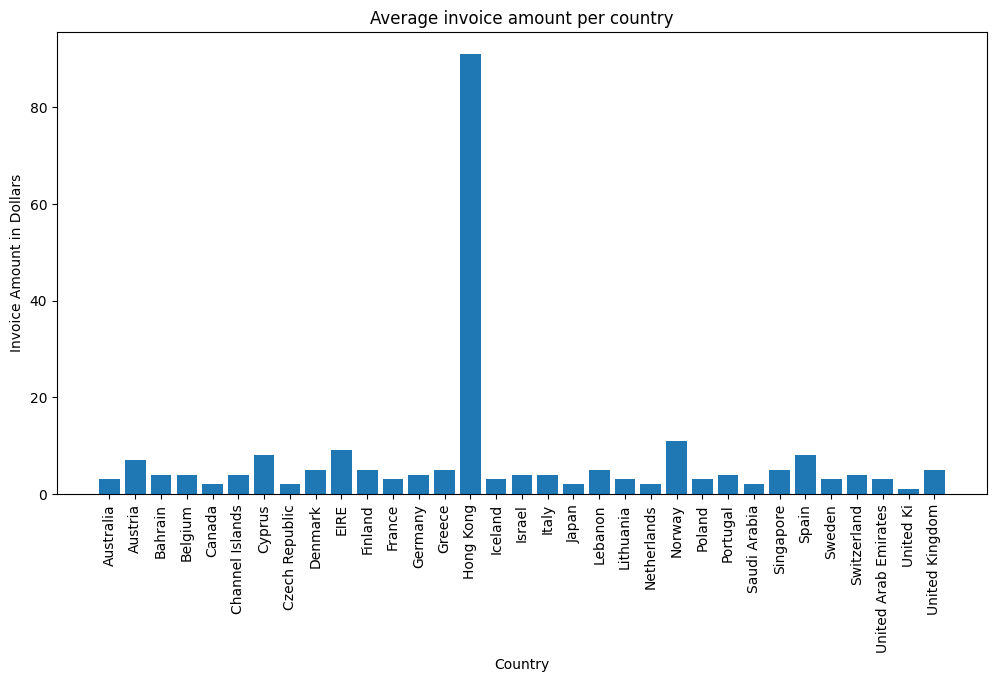

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [15]:
#invoice amount per country average
invoice_amount_by_country = round(countries_grouped['UnitPrice'].agg(np.average))
# create bar plot
fig = plt.figure(figsize =(12,6))
plt.bar(invoice_amount_by_country.index, invoice_amount_by_country)
plt.xlabel('Country')
plt.ylabel("Invoice Amount in Dollars")
plt.title("Average invoice amount per country")
plt.xticks(rotation = 90)
plt.show()
print(data.columns)

In [71]:
# create new data frame and csv file put according to customer
def customer_sort():
  customer_data = []
  invoice_dates = []
  unique_customers = data['CustomerID'].unique()

  for customer_id in unique_customers:
      customer_subset = data[data['CustomerID'] == customer_id]
      today = datetime.today()

      # Get customer country
      customer_country = str(customer_subset['Country'].unique())
        # Get the most recent invoice date for the customer
      most_recent_invoice_date = customer_subset['InvoiceDate'].max()
      recency = (today - most_recent_invoice_date).days

      # Calculate RFM metrics
      customer_invoices = customer_subset['InvoiceNo'].count()
      invoice_amount = customer_subset['UnitPrice'].mean()
      total_amount = customer_subset['UnitPrice'].sum()
      invoice_quantities = customer_subset['Quantity'].mean()

      # Append customer data to the list
      customer_data.append([customer_id, customer_country, customer_invoices, invoice_amount, total_amount, invoice_quantities])

  # Create a DataFrame from the collected customer data
  customer_frame = pd.DataFrame(customer_data, columns=['ID', 'Country', 'Total Orders', 'Average Amount', 'Total Amount', 'Average Quantities'])

  # Save the customer data as a CSV file
  customer_frame.to_csv('customer_data.csv', index=False)
  # return customer_frame
  return customer_frame


customer_sort()





TypeError: ignored